# Departamento de Engenharia de Teleinformática

# Computação Numérica / Métodos Numéricos

# Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))

# Darlan Cavalcante Moreira, M.Sc. (Colaborador: [darlan@gtel.ufc.br](mailto:darlan@gtel.ufc.br))

## Identificação do aluno

Nome: Ariel da Silva Barros

Matrícula: 374918

## Instruções

As questões abaixo devem ser resolvidas aqui mesmo no **Jupyter Notebook** e podem envolver tanto soluções escritas em markdown (veja sintaxe para markdown [aqui](https://daringfireball.net/projects/markdown/basics)), como soluções em código. A questão 0 abaixo serve de exemplo de como as questões devem ser resolvidas.

<div class="alert alert-warning">
**Dica:** em células markdown vocês podem usar dois espaços para criar uma quebra de linha.
</div>

----

## Questão 0

Para entender como as questões devem ser resolvidas, faça:

1. Em que país estamos?
2. Implemente uma função que retorne o dobro da entrada


## Solução de 0

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Estamos no Brasil.

<!-- Não apague o div -->
</div>

In [1]:
# Solução de 2: Implementação em python
def dobro(x):
    return 2 * x

----

## Informações de entrada
Em comunicações móveis, a distorção de pequena escala introduzida pelo meio em um canal de comunicação sem fio pode ser modelada como um ganho $g(t)$ variante no tempo que afeta multiplicativamente o sinal $s(t)$ que trafega através do canal. O ganho do desvanecimento de pequena escala segue uma distribuição Rayleigh e pode ser simulado utilizando diferentes modelos. Um modelo bastante utilizado é o modelo de Jakes no qual
$
    g(t) = \vert h(t) \vert^2 = \left\vert \frac{1}{\sqrt{L}}\sum\limits_{l = 0}^{L-1} \exp( j ( 2\pi f_{D} \cos(\phi_l) t + \varphi_l ) ) \right\vert^2,
$
onde:
- $L$ é o número de multi-percursos do canal (raios ou caminhos através do qual réplicas do sinal transmitido chegam até o receptor);
- $f_D$ é o máximo desvio de frequência Doppler, dado por $f_D = \dfrac{v f_c}{c}$, onde $v$ é a velocidade do terminal móvel em m/s, $f_c$ é a frequência da portadora em Hz, e $c$ é a velocidade da luz em m/s;
- $\phi_l$ e $\varphi_l$ são variáveis aleatórias uniformemente distribuídas no intervalo $[0, 2\pi)$.

A função abaixo gera o ganho do canal para um *array* `numpy` de tempo $t$ e demais parâmetros físicos do modelo do canal ($L$, $f_c$, e $v$).

In [2]:
%matplotlib notebook
# Note que não foi feita nenhuma checagem de erros
import numpy as np
import matplotlib.pyplot as plt
def Jakes(t, f_c, v, L):
    # f_c é dada em Hertz
    # v é dada em m/s
    # c é 3 x 10^8 m/s
    c = 3e8;
    # Gera as fases aleatórias entre [0, 2*pi]
    Phi = np.pi * np.random.random(L);
    phi = np.pi * np.random.random(L);
    # Calcula o máximo desvio Doppler
    f_D = v*f_c/c
    # Calcula g usando uma python list comprehension
    g = np.array( [ np.abs((1/np.sqrt(L))*np.sum(np.exp(1j*(2*np.pi*f_D*np.cos(Phi)*x + phi))))**2 for x in t ] )
    return g

<IPython.core.display.Javascript object>


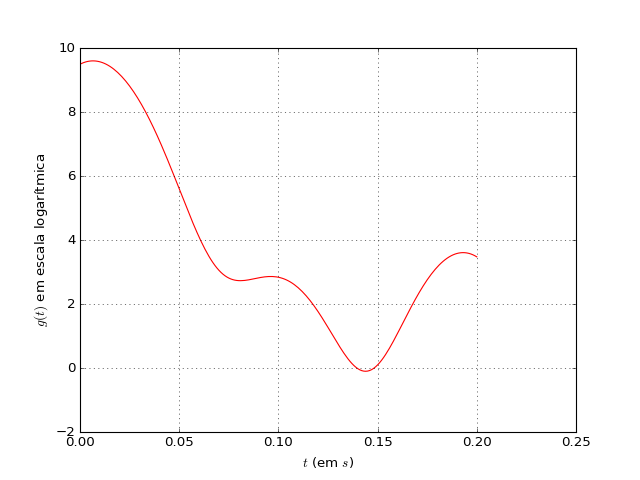

<IPython.core.display.Javascript object>


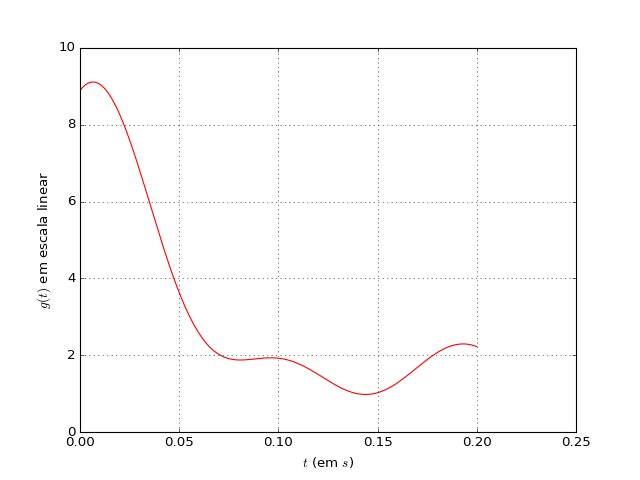

In [3]:
# Chama a função acima para gerar 201 amostras de um canal aleatório
t = np.linspace(0, 0.2, 201); # Gera um array numpy com 201 amostras uniformemente espaçadas de 1e-3
f_c = 2e9; # Frequência do sistema é de 2 GHz
v = 3/3.6; # Velocidade do móvel de 3 km/h (pedestre)
L = 20;    # O canal possui 20 multi-percursos
# Gera as amostras do canal
g = Jakes(t, f_c, v, L)
# Plota o gráfico do ganho do canal em função do tempo (eixo y em escala logarítmica)
plt.figure();
plt.plot(t, 10*np.log10(g), 'r-')
plt.grid()
plt.ylabel('$ g(t) $ em escala logarítmica')
plt.xlabel('$t$ (em $s$)')
plt.show()
# Plota o gráfico do ganho do canal em função do tempo (eixo y em escala normal)
plt.figure();
plt.plot(t, g, 'r-')
plt.grid()
plt.ylabel('$ g(t) $ em escala linear')
plt.xlabel('$t$ (em $s$)')
plt.show()

----

## Questão 1
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60$ e $80$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, $(60\times 10^{-3}, g(60\times 10^{-3}))$, $(80\times 10^{-3}, g(80\times 10^{-3}))$. Para esses 05 pares ordenados $(x_i, y_i)$, calcule os coeficientes do polinômio interpolador de quarta ordem resolvendo o sistema de 05 equações $p(x_i) = y_i$ para $i = 1, 2, 3, 4$ e $5$, implementando para tanto o método da eliminação de Gauss. Plote num mesmo gráfico os valores de $g(t)$ e os valores de seu $p(t)$ para $t = 0$ até $80$ ms com passo de $1$ ms.

<IPython.core.display.Javascript object>


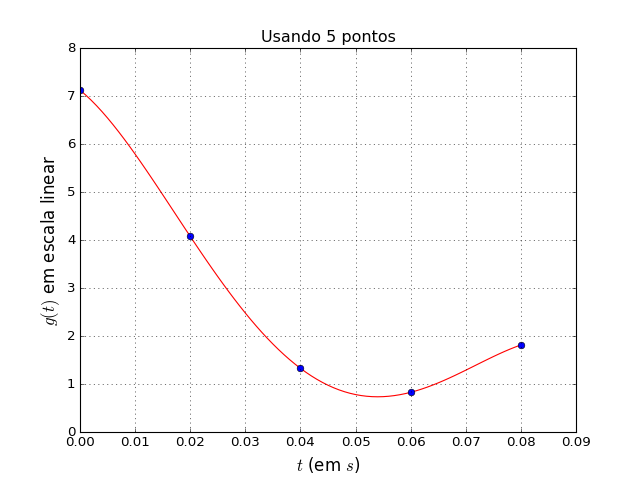

In [4]:
def pivoting(A, b, i):
    j = i; maior = 0; LinhaMaior = i
    # Escolhe a linha com maior pivot
    while i < len(A): 
        if abs(A[i][j]) > maior:
            maior = A[i][j]
            LinhaMaior = i
        i += 1
    # Permuta linha com maior pivot com linha atual    
    aux = np.copy(A[j])
    A[j] = A[LinhaMaior]
    A[LinhaMaior] = aux
    # Análogo ao código acima para o vetor b
    aux = np.copy(b[j])
    b[j] = b[LinhaMaior]
    b[LinhaMaior] = aux

def substituicaoRegressiva(A,b):
    n = len(A); x = np.zeros(n); Sx = 0
    for i in range(n-1,-1,-1):
        Sx = 0
        for j in range(i+1,n):
            Sx = Sx + A[i][j] * x[j]
        x[i] = 1 / A[i][i] * (b[i] - Sx)
    return x # retorna solução do sistema.

def gauss(A,b):
    n = len(A)
    for i in range(n):
        pivoting(A,b,i) # Pivotação.
        pivot = A[i][i]
        for j in range(i+1,n):
            fator = A[j][i] / pivot
            A[j] = A[j] - fator * A[i]
            b[j] = b[j] - fator * b[i]
    return substituicaoRegressiva(A,b)

def p(x,t,n): # Função que constroi o polinômio
    y = 0
    for i in range(n):
        y += x[i] * t**(n-1-i)
    return y

def interpolador(x,y,t):
    n = len(x)
    yy = np.copy(y)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = x[i]**(j)
    coeficientes = gauss(A,y)
    pol = p(coeficientes[::-1],t,n)
    
    #plota o gráfico com as amostras e o polinômio
    plt.figure();
    plt.plot(t, pol, 'r-')
    plt.plot(x, yy, 'o')
    plt.grid()
    plt.title('Usando %d pontos'%(n))
    plt.ylabel('$ g(t) $ em escala linear',fontsize=15)
    plt.xlabel('$t$ (em $s$)',fontsize=15)
    plt.show()

n = 5 # é possível interpolar para diferentes valores de n
amostras = np.linspace(0,80e-3,n) 
g = Jakes(amostras, f_c, v, L)
t = np.arange(0,81e-3,1e-3) # step de 1 ms.

interpolador(amostras,g,t)

## Questão 2
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 10, 20, 30$ e $40$ ms. Escreva sua própria função `polyfit` para realizar a regressão polinomial e calcular os polinômios de primeira, segunda e terceira ordem que melhor se ajustam aos dados. Confira seus resultados utilizando a função `polyfit` padrão do `numpy`. Plote gráficos de seus polinômios regressores e dos dados reais da função `Jakes`.

Coeficientes da minha polyfit: 
[-163.15537419    8.35226285]
Coeficientes polyfit da biblioteca numpy:
[-163.15537419    8.35226285]


<IPython.core.display.Javascript object>


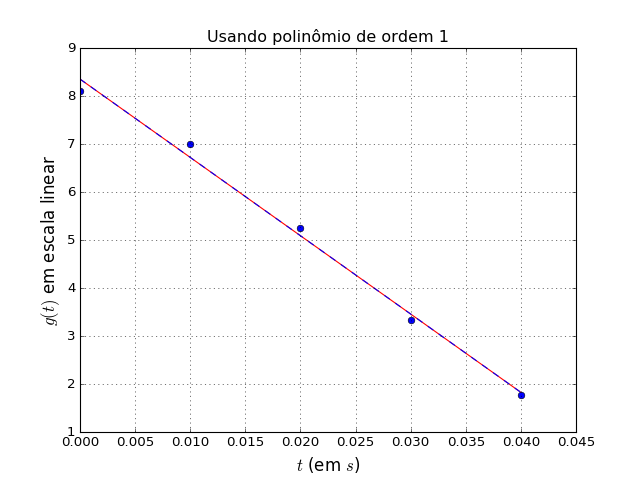

Coeficientes da minha polyfit: 
[-776.8214156  -132.08251756    8.19689857]
Coeficientes polyfit da biblioteca numpy:
[-776.8214156  -132.08251756    8.19689857]


<IPython.core.display.Javascript object>


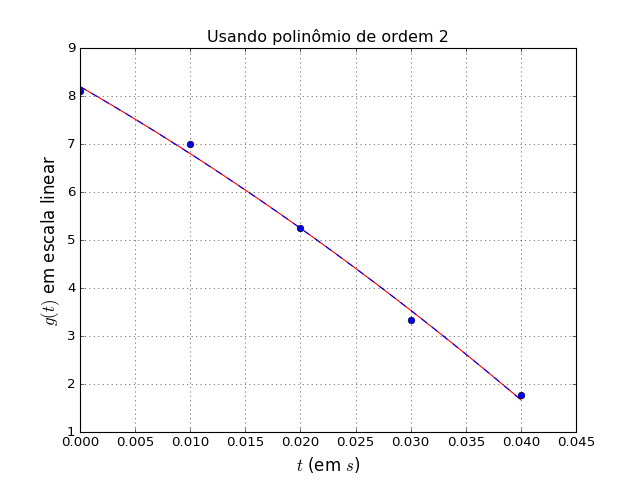

Coeficientes da minha polyfit: 
[  8.00695024e+04  -5.58099156e+03  -6.32227455e+01   8.10081517e+00]
Coeficientes polyfit da biblioteca numpy:
[  8.00695024e+04  -5.58099156e+03  -6.32227455e+01   8.10081517e+00]


<IPython.core.display.Javascript object>


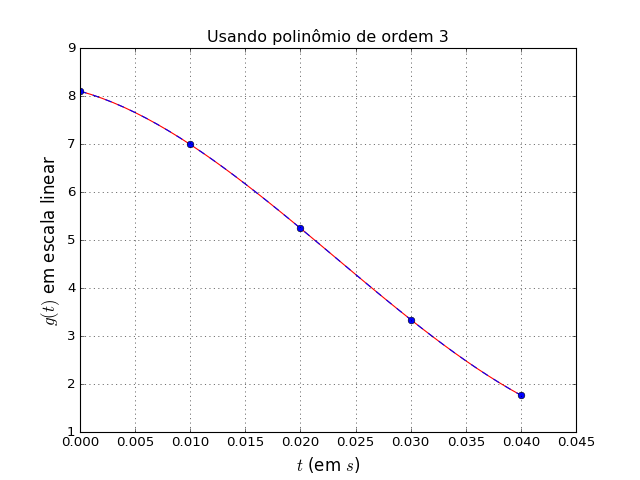

In [5]:
def polyfit(x,y,m):
    t = np.arange(0,41e-3,1e-3)   
    A = np.zeros((m+1,m+1)); b = np.zeros(m+1); xsum = np.zeros(2*m + 1); 
    for i in range(2*m + 1): # somatórios de x
        xsum[i] = np.sum(x**i)
    for i in range(m+1): # Preenche a matriz
        for j in range(m+1):
            A[i][j] = xsum[i + j]
        b[i] = np.sum(x**i * y)
    coeficientes2 = np.polyfit(x,y,m) # Usando polyfit numpy
    coeficientes  = gauss(A,b) # implementado na 1 questão
    print("Coeficientes da minha polyfit: ")
    print(coeficientes[::-1])
    print("Coeficientes polyfit da biblioteca numpy:")
    print(coeficientes2)
    pol  = p(coeficientes[::-1],t,m+1) # p definido na questão 1
    pol2 = p(coeficientes2,t,m+1)
    #plotagem das amostras e do polinômio de regressão.
    plt.figure()
    plt.plot(t, pol, 'r-') # Polinomio 1 - minha polyfit
    plt.plot(t, pol2, 'b--') # Polinomio 2 - polyfit numpy
    plt.plot(x, y, 'o') # Amostras
    plt.grid()
    plt.title('Usando polinômio de ordem %d'%(m))
    plt.ylabel('$ g(t) $ em escala linear',fontsize=15)
    plt.xlabel('$t$ (em $s$)',fontsize=15)
    plt.show()
    
amostras = np.linspace(0,40e-3,5)
g = Jakes(amostras, f_c, v, L)
m = 1 # ordem do polinomio de regressão
polyfit(amostras,g,m)
polyfit(amostras,g,2)
polyfit(amostras,g,3)


## Questão 3
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60, 80, 100$ e $120$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, ..., $(120\times 10^{-3}, g(120\times 10^{-3}))$. Implemente uma função que calcule o polinômio interpolador de Newton para esse conjunto de pontos. Plote gráficos dos dados exatos e do polinômio interpolador para $x \in [0, 120]$ ms com passo de 1 ms. Para obter bônus nessa questão, sua função deve ser flexível o suficiente para funcionar com qualquer quantidade de pontos.

<IPython.core.display.Javascript object>


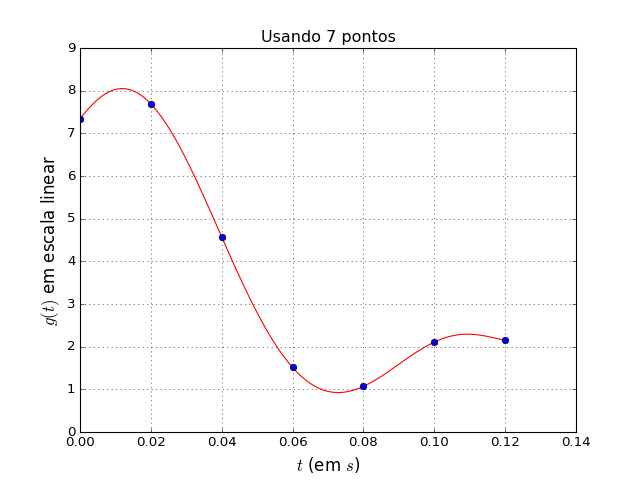

In [6]:
def newton(x,y,t):        
    n = len(x) # numero de coeficientes do polinomio
    a = np.zeros(n) # Vetor de coeficietnes
    divDif = np.zeros((n-1,n-1)) # matriz de diferenças divididas
    a[0] = y[0] # coeficiente a0.
    for i in range(n - 1): # preenche a primeira coluna da matrix de diferença dividida
        divDif[i][0] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
    for i in range(1,n-1): # preenche restante da matriz de diferença dividida
        for j in range(n-1-i):
            divDif[j][i] = (divDif[j+1][i-1] - divDif[j][i-1]) / (x[j+i+1] - x[j])
    for i in range(0,n-1): # determinação dos coeficientes a1 até an-1
        a[i+1] = divDif[0][i]
    # calcula polinômio interpolador
    pol = a[0]
    mul = t - x[0] 
    for i in range(1,n):        
        pol = pol + a[i]*mul
        mul = mul * (t - x[i])
    #plota o gráfico com as amostras e o polinômio
    plt.figure();
    plt.plot(t, pol, 'r-') # Polinomio 
    plt.plot(x, y, 'o') # Amostras
    plt.grid()
    plt.title('Usando %d pontos'%(n))
    plt.ylabel('$ g(t) $ em escala linear',fontsize=15)
    plt.xlabel('$t$ (em $s$)',fontsize=15)
    plt.show()

n = 7 # é possível interpolar para diferentes valores de n

amostras = np.linspace(0,120e-3,n)
g = Jakes(amostras, f_c, v, L)
t = np.arange(0,121e-3,1e-3) # variando de 0 à 120ms a um passo de 1ms

newton(amostras,g,t)

## Questão 4
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60, 80, 100$ e $120$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, ..., $(120\times 10^{-3}, g(120\times 10^{-3}))$. Implemente a interpolação por *splines* cúbicas naturais para o conjunto de dados fornecido. Plote gráficos dos dados exatos e das *splines* para $x \in [0, 120]$ ms com passo de 1 ms. Considere as mesmas condições estabelecidas na seção 5.6.3 do livro *Métodos Numéricos para Engenheiros e Cientistas* de *Amos Gilat & Vish Subramaniam*. Para obter bônus nesse item, sua função deve ser flexível o suficiente para funcionar com qualquer quantidade de pontos.


<IPython.core.display.Javascript object>


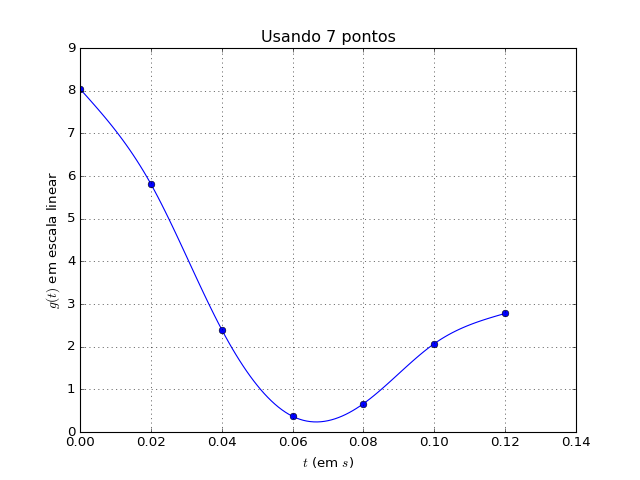

In [7]:
from scipy.ndimage.interpolation import shift
def splines(x,y,t,visualCubicas):
    h = (shift(x, -1, cval=np.NaN) - x)[:n-1] # h = xi+1 - xi
    a = np.zeros(n) # vetor dos coeficientes usado nas splines
    A = np.zeros((n-2,n-2)) # matriz para a determinação dos coeficientes
    b = np.zeros(n-2) # vetor b usando na determinação dos coeficientes
            
    # Preenche matriz A de coeficientes
    A[0][0] = 2 * (h[0] + h[1])
    A[0][1] = h[1]
    A[len(A)-1][len(A)-1] = 2 * (h[n-3] + h[n-2]) 
    A[len(A)-1][len(A)-2] = h[n-2]
    for i in range(1,len(A)-1):    
        A[i][i]   = 2 * (h[i] + h[i+1])
        A[i][i-1] = h[i-1]
        A[i][i+1] = h[i+1]
    # Preenche o vetor b do sistema
    for i in range(n-2):
        b[i] += ((y[i+2] - y[i+1]) / h[i+1]) - ((y[i+1] - y[i]) / h[i])
        b[i] = 6*b[i]        
    # determinação dos coeficientes a1 a an-1. a1 = an = 0. Splines cúbicas naturais
    a[1:n-1] = gauss(A,b) # implementado na 1 questão
    
    #Calcula as splines de acordo com cada intervalo    
    pol = np.zeros(len(t))
    for i in range(len(t)):
        for j in range(n-1): # localiza qual intervalo o ponto em questão pertence.
            if t[i] < x[j+1]:
                break
        pol[i] =  (a[j] / (6 * h[j])) * (x[j+1] - t[i])**3
        pol[i] += (a[j+1] / (6*h[j])) * (t[i] - x[j])**3
        pol[i] += ((y[j] / h[j]) - (a[j]*h[j]/6)) * (x[j+1] - t[i])
        pol[i] += ((y[j+1] / h[j]) - (a[j+1]*h[j] / 6)) * (t[i] - x[j])
        
    if visualCubicas: # habilita visualização de cada função cúbica (opcional)
        pol2 = np.zeros((n - 1, len(t)))
        for j in range(n-1):
            for i in range(len(t)):
                pol2[j][i] =  (a[j] / (6 * h[j])) * (x[j+1] - t[i])**3
                pol2[j][i] += (a[j+1] / (6*h[j])) * (t[i] - x[j])**3
                pol2[j][i] += ((y[j] / h[j]) - (a[j]*h[j]/6)) * (x[j+1] - t[i])
                pol2[j][i] += ((y[j+1] / h[j]) - (a[j+1]*h[j] / 6)) * (t[i] - x[j])

    #plota o gráfico com as amostras e o polinômio
    plt.figure();
    if visualCubicas:
        for i in range(len(pol2)): # plota cada função cúbica.
            colors = 'bgrcmykw'
            plt.plot(t, pol2[i], colors[i % len(colors)]+'--')
        plt.xlim((0,120e-3))
        plt.ylim((-5,15))
    else:
        plt.plot(t, pol, 'b-') # Polinomio 
    plt.plot(x, y, 'o') # Amostras
    plt.grid()
    plt.title('Usando %d pontos'%(n))
    plt.ylabel('$ g(t) $ em escala linear')
    plt.xlabel('$t$ (em $s$)')
    plt.show()

n = 7 # é possível interpolar para diferentes valores de n

# Habilitando a variável abaixo é possível ver as funções cúbicas que produzem as splines. Com isso pode ser percebido 
# que em cada ponto interno a derivada das duas funções adjacentes são iguais e essas funções nesses pontos possuem 
# mesma concavidade. Essas características são condições das splines cúbicas naturais.
visualCubicas = False  

amostras = np.linspace(0,120e-3,n)
g = Jakes(amostras, f_c, v, L)
t = np.arange(0,121e-3,1e-3) # variando de 0 à 120ms a um passo de 1ms

splines(amostras,g,t,visualCubicas)

----

# Aparência do Notebook

A célula abaixo contém código cuja única finalidade é modificar a aparência do notebook após a célula ser executada.

In [ ]:
from IPython.core.display import HTML, display

# O arquivo styles.css deve estar na mesma pasta que o notebook
def css_styling():
    try:
        styles = open("./styles.css", "r").read()
        html = "<style>{0}</style>".format(styles)
    except FileNotFoundError:
        html = "<b style=\"font-size: 25px\">Arquivo 'styles.css' não encontrado</b>"
    return HTML(html)
display(css_styling())